## Simulacion de flujo de carga

In [1]:
import pandapower as pp

net6 = pp.create_empty_network()

#Crear los barrajes del Sistema 
bus1 = pp.create_bus(net6, name= "B1 HV busbar", vn_kv= 110, type= "b")
bus2 = pp.create_bus(net6, name= "B2 HV busbar 2", vn_kv= 110, type= "b")
bus3 = pp.create_bus(net6, name= "B3 HV Transformer Bus", vn_kv= 110, type= "n")
bus4 = pp.create_bus(net6, name= "B4 MV Transformer Bus", vn_kv= 20, type= "n")
bus5 = pp.create_bus(net6, name= "B5 MV Main Bus", vn_kv= 20, type= "b")
bus6 = pp.create_bus(net6, name= "B6 MV Bus 1 - Gen1", vn_kv= 20, type= "b")
bus7 = pp.create_bus(net6, name= "B7 MV Bus 2 - Static Gen2", vn_kv= 20, type= "b")

#Crea red Ext.
pp.create_ext_grid(net6, name= "Red_Ext", bus= bus1, vm_pu= 1.02, va_degree= 50) 

#Crea Transformador de Potencia
pp.create_transformer(net6,hv_bus= bus3, lv_bus= bus4, name= "110/20 kV XMFR", std_type= "25 MVA 110/20 kV")

#Crea lineas del sistema
line1 = pp.create_line(net6, from_bus= bus1, to_bus= bus2, length_km= 10, 
                       std_type= "N2XS(FL)2Y 1x300 RM/35 64/110 kV", name= "Linea 1")
line2 = pp.create_line(net6, from_bus= bus5, to_bus= bus6, length_km= 2, 
                       std_type= "NA2XS2Y 1x240 RM/25 12/20 kV", name= "Linea 2")
line3 = pp.create_line(net6, from_bus= bus6, to_bus= bus7, length_km= 3.5,
                       std_type= "48-AL1/8-ST1A 20.0", name= "Linea 3")
line4 = pp.create_line(net6, from_bus= bus7, to_bus= bus5, length_km= 2.5,
                       std_type= "NA2XS2Y 1x240 RM/25 12/20 kV", name= "Linea 4")


# Creacion Interruptores del sistema
sw1 = pp.create_switch(net6, bus= bus2, element= bus3, et= "b", type= "CB", 
                       closed= True, name= "SW1")

sw2 = pp.create_switch(net6, bus= bus4, element= bus5, et= "b", type= "CB", 
                       closed= True, name= "SW2")

sw3 = pp.create_switch(net6, bus= bus5, element= line2, et= "l", type= "LBS", 
                       closed= True, name= "SW3")

sw4 = pp.create_switch(net6, bus= bus6, element= line2, et= "l", type= "LBS", 
                       closed= True, name= "SW4")

sw5 = pp.create_switch(net6, bus= bus6, element= line3, et= "l", type= "LBS", 
                       closed= True, name= "SW5")

# sw6 en posicion abierto
sw6 = pp.create_switch(net6, bus= bus7, element= line3, et= "l", type= "LBS", 
                       closed= False, name= "SW5")

sw7 = pp.create_switch(net6, bus= bus7, element= line4, et= "l", type= "LBS", 
                       closed= True, name= "SW7")

sw8 = pp.create_switch(net6, bus= bus5, element= line4, et= "l", type= "LBS", 
                       closed= True, name= "SW8")

# Creacion carga constante
load1 = pp.create_load(net6, bus= bus7, p_mw= 2.0, q_mvar=4.0, scaling= 0.6, name= "Carga 1")

# Creacion carga variable ZIP
zip_load = pp.create_load(net6, bus7, p_mw=2.0, q_mvar= 4.0, const_z_percent= 30, 
                         const_i_percent= 20, name= "zip_load1")

#Creacion Generador Estatico
stGen1 = pp.create_sgen(net6, bus7, p_mw= 2.0, q_mvar= -0.5, name= "Gen_Estatico")


#Creacion generador 
gen1 = pp.create_gen(net6, bus= bus6, p_mw= 6.0, vm_pu= 1.03, max_q_mvar= 3.0, 
                     min_q_mvar= -3.0, name= "Gen_1")

#Creacion banco de compensacion
cap1 = pp.create_shunt(net6, bus= bus3, q_mvar= -0.96, p_mw= 0, name="Shunt_1")

net6

This pandapower network includes the following parameter tables:
   - bus (7 elements)
   - load (2 elements)
   - sgen (1 element)
   - gen (1 element)
   - switch (8 elements)
   - shunt (1 element)
   - ext_grid (1 element)
   - line (4 elements)
   - trafo (1 element)

In [2]:
net6.shunt

,bus,name,q_mvar,p_mw,vn_kv,step,max_step,in_service
0,2,Shunt_1,-0.96,0.0,110.0,1,1,True


In [3]:
pp.runpp(net6)

In [4]:

net6.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.020000,0.000000,4.685473,6.871526
1,1.020697,0.019706,0.000000,0.000000
2,1.020697,0.019706,0.000000,-1.000150
3,1.022545,1.254489,0.000000,0.000000
4,1.022545,1.254489,0.000000,0.000000
5,1.030000,1.199131,-6.000000,-7.131442
6,1.016882,1.497692,1.227182,6.954365


In [5]:
import matplotlib.pyplot as plt
import numpy as np

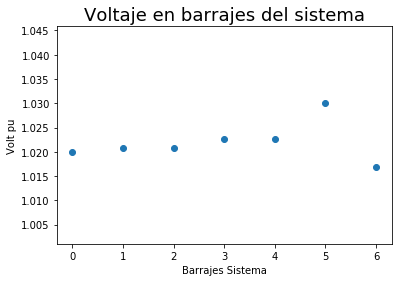

In [6]:
caso1 = net6.res_bus.vm_pu
plt.scatter(range(0,7),caso1)
plt.xlabel("Barrajes Sistema")
plt.ylabel("Volt pu")
plt.title("Voltaje en barrajes del sistema", fontsize="18")
plt.show()

In [7]:
net6.switch.closed.iloc[5] = True
net6.switch.closed.iloc[6] = True
print(net6.switch.closed) 
pp.runpp(net6)
caso2 = net6.res_bus.vm_pu

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
Name: closed, dtype: bool


In [8]:
net6.switch.closed.iloc[6] = False
print(net6.switch.closed) 
pp.runpp(net6)
caso3 = net6.res_bus.vm_pu

0     True
1     True
2     True
3     True
4     True
5     True
6    False
7     True
Name: closed, dtype: bool


In [9]:
net6.switch.closed.iloc[6] = True
net6.switch.closed.iloc[3] = False
print(net6.switch.closed) 
pp.runpp(net6)
caso4 = net6.res_bus.vm_pu

0     True
1     True
2     True
3    False
4     True
5     True
6     True
7     True
Name: closed, dtype: bool


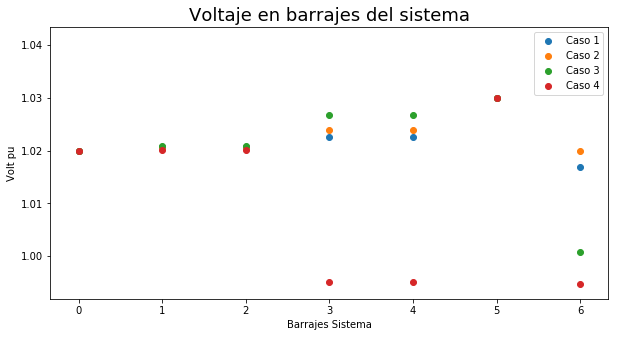

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(range(0,7),caso1)
plt.scatter(range(0,7),caso2)
plt.scatter(range(0,7),caso3)
plt.scatter(range(0,7),caso4)
plt.xlabel("Barrajes Sistema")
plt.ylabel("Volt pu")
plt.title("Voltaje en barrajes del sistema", fontsize="18")
plt.legend(['Caso 1', 'Caso 2', 'Caso 3', 'Caso 4'], fontsize=10, frameon=True)

**Caso 1** : linea 3 abierta
**Caso 2** : Anillo
**Caso 3** : linea 4 abierta
**Caso 4** : linea 2 abierta

![Unifilar](https://github.com/e2nIEE/pandapower/raw/052b07c6e9c3099c03e40c694d598b05ffeb8b78/tutorials/pics/example_network_simple.png)  